In [11]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [12]:
# Carregar os dados dos arquivos CSV
atendimento = pd.read_csv('atendimento.csv')
vendas = pd.read_csv('vendas.csv')

In [13]:
# Conversão das colunas de data para o formato datetime
# A linha abaixo converte a coluna data_atendimento para o formato datetime. O parâmetro errors='coerce' converte valores inválidos em NaT (Not a Time).
atendimento['data_atendimento'] = pd.to_datetime(atendimento['data_atendimento'], errors='coerce')
# Esta linha converte a coluna data_venda para o formato datetime, também com errors='coerce' para lidar com valores inválidos.
vendas['data_venda'] = pd.to_datetime(vendas['data_venda'], errors='coerce')

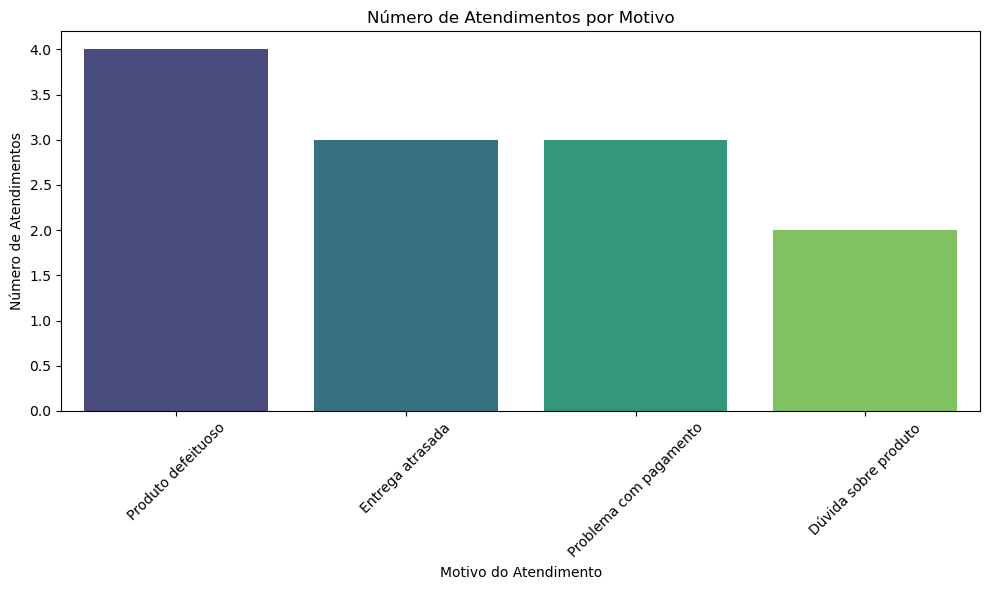

In [14]:
# Gráfico de Barras: Número de Atendimentos por Motivo
# Define o tamanho da figura do gráfico em 10 (largura) por 6 (altura)
plt.figure(figsize=(10, 6))
# Cria um gráfico de barras (countplot) para visualizar o número de atendimentos por motivo
# O parâmetro data=atendimento especifica o DataFrame que contém os dados,
# x='motivo' indica a coluna a ser plotada no eixo x,
# hue='motivo' colore as barras para cada valor único em 'motivo',
# palette=viridis' aplica uma paleta de cores ao gráfico,
# e 'legend=False' remove a legenda, já que a variável 'motivo' aparece no eixo x.
sns.countplot(data=atendimento, x='motivo', hue='motivo', palette='viridis', legend=False)
# Define o título do gráfico
plt.title("Número de Atendimentos por Motivo")
# Define o rótulo do eixo x
plt.xlabel("Motivo do Atendimento")
# Define o rótulo do eixo y
plt.ylabel("Número de Atendimentos")
# Rotaciona os rótulos do eixo x em 45 graus para melhor visualização
plt.xticks(rotation=45)
# Ajusta o layout para evitar sobreposição de elementos no gráfico
plt.tight_layout()
# Exibe o gráfico
plt.show()

In [15]:
# --- Gráfico de Linha: Tendência de Vendas nos Últimos Seis Meses ---

# Define a data limite para incluir apenas as vendas dos últimos seis meses a partir da data mais recente no dataset vendas. 
# A função max() encontra a data mais recente em data_venda, e timedelta(days=6*30)
# subtrai aproximadamente seis meses dessa data, definindo o ponto de corte.
dataLimite = vendas['data_venda'].max() - timedelta(days=6*30)

# Filtra o DataFrame vendas para incluir apenas as vendas realizadas a partir da data limite calculada.
# Aqui, são selecionadas apenas as linhas onde data_venda é maior ou igual à data_limite, 
# resultando em um DataFrame vendas_seis_meses com vendas dos últimos seis meses.
vendasSeisMeses = vendas[vendas['data_venda'] >= dataLimite]


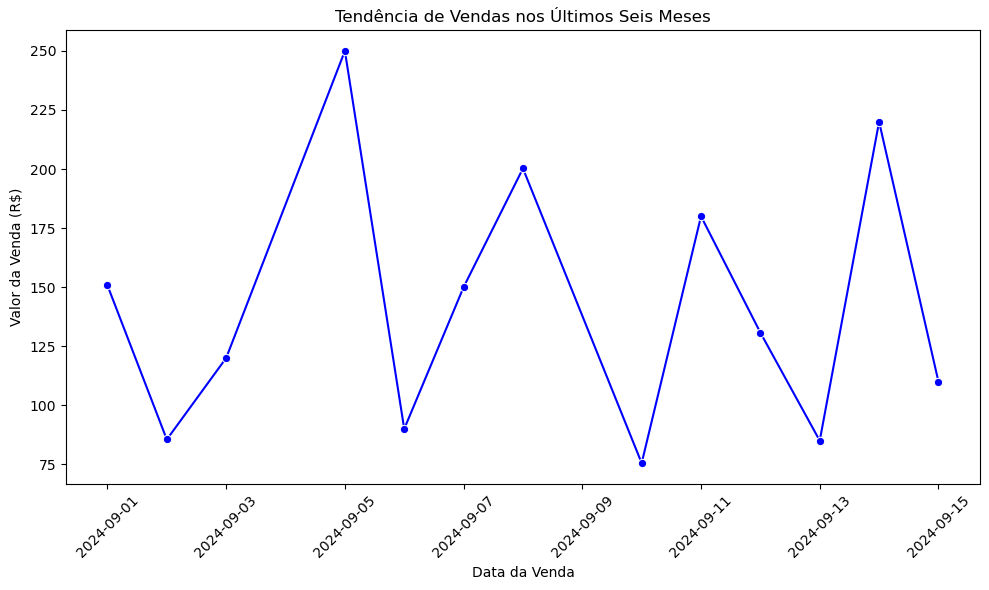

In [16]:
# Define o tamanho da figura para o gráfico de linha, com largura 10 e altura 6.
plt.figure(figsize=(10, 6))
# Cria um gráfico de linha (lineplot) para mostrar a tendência de vendas nos últimos seis meses.
# data=vendasSeisMeses especifica o DataFrame contendo os dados filtrados dos últimos seis meses.
# x= 'dataVenda' define a coluna dataVenda no eixo x e y='valor_venda' define valor_venda no eixo y.
# marker='o' adiciona um marcador circular em cada ponto da linha, e color="blue" define a cor da linha como azul.
sns.lineplot(data=vendasSeisMeses, x='data_venda', y='valor_venda', marker='o', color='blue')
# Define o título do gráfico
plt.title("Tendência de Vendas nos Últimos Seis Meses")
# Define o rótulo do eixo x
plt.xlabel("Data da Venda")
# Define o rótulo do eixo y
plt.ylabel("Valor da Venda (R$)")
# Rotaciona os rótulos do eixo x em 45 graus para melhorar a legibilidade das datas
plt.xticks(rotation=45)
# Ajusta o layout para evitar sobreposição de elementos no gráfico
plt.tight_layout()
# Exibe o gráfico
plt.show()